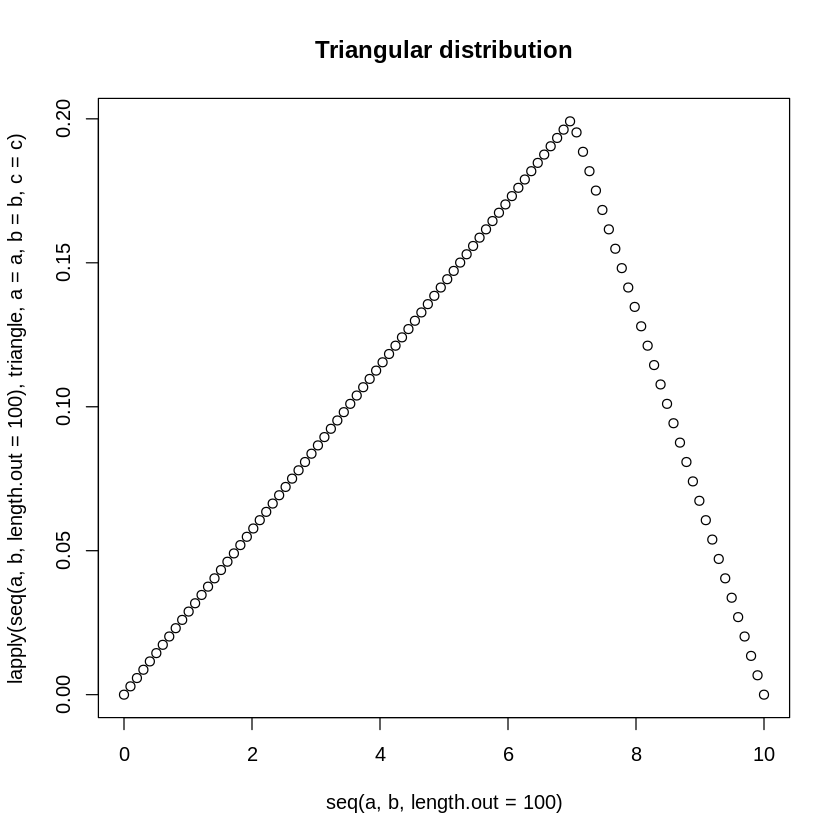

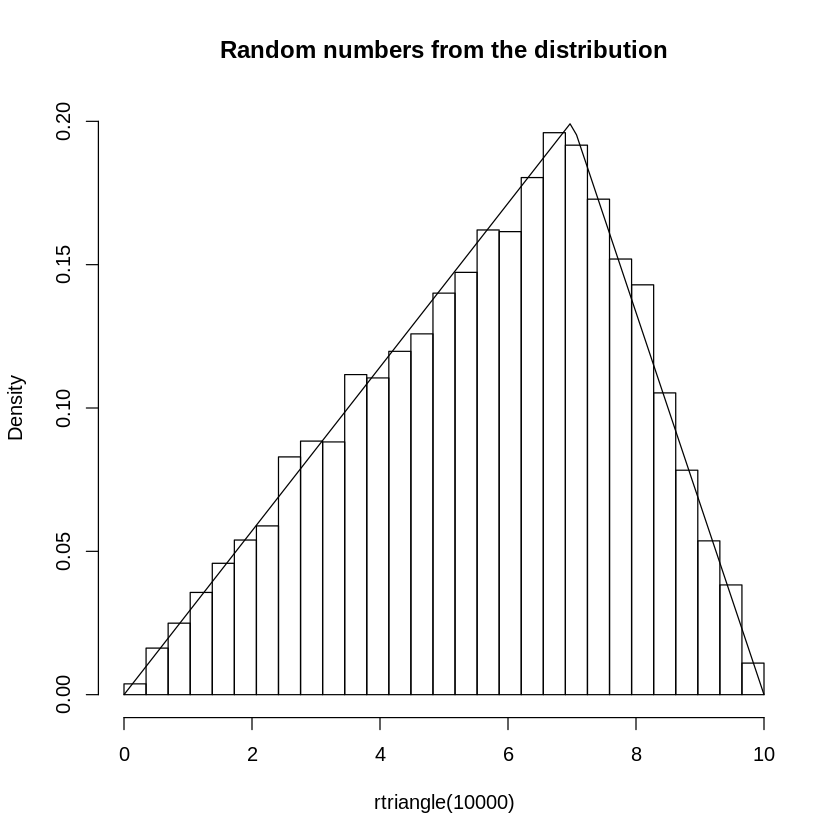

In [111]:
#Ex 1

triangle <- function(x,a,b,c){
    if(a<=x && x<c) p <- 2*(x-a)/((b-a)*(c-a))
    else if (c<=x && x<=b) p <- 2*(b-x)/((b-a)*(b-c))
    else p <- 0
    return(p)
    }


a <- 0
b <- 10
c <- 7
plot(seq(a,b,length.out=100),lapply(seq(a,b,length.out=100),triangle,a=a,b=b,c=c),main="Triangular distribution")


rtriangle <- function(n){
    carrier <- vector()
    counter <- 0
    while (counter < n){
        u <- runif(2*(n-counter),a,b)
        test <- runif(2*(n-counter),0,2/(b-a))
        token<-ifelse(test < lapply(u,triangle,a=a,b=b,c=c),u,NA) 
        token <- token[!(is.na(token))]
        counter <- counter + length(token)  
        carrier <- c(carrier,token)
        }
    carrier <- carrier[1:n]
    return(carrier)
    }
    
hist(rtriangle(10000),main="Random numbers from the distribution",prob=TRUE,ylim=c(0,0.2),breaks=seq(a,b,length.out=30) )
lines(seq(a,b,length.out=100),lapply(seq(a,b,length.out=100),triangle,a=a,b=b,c=c))

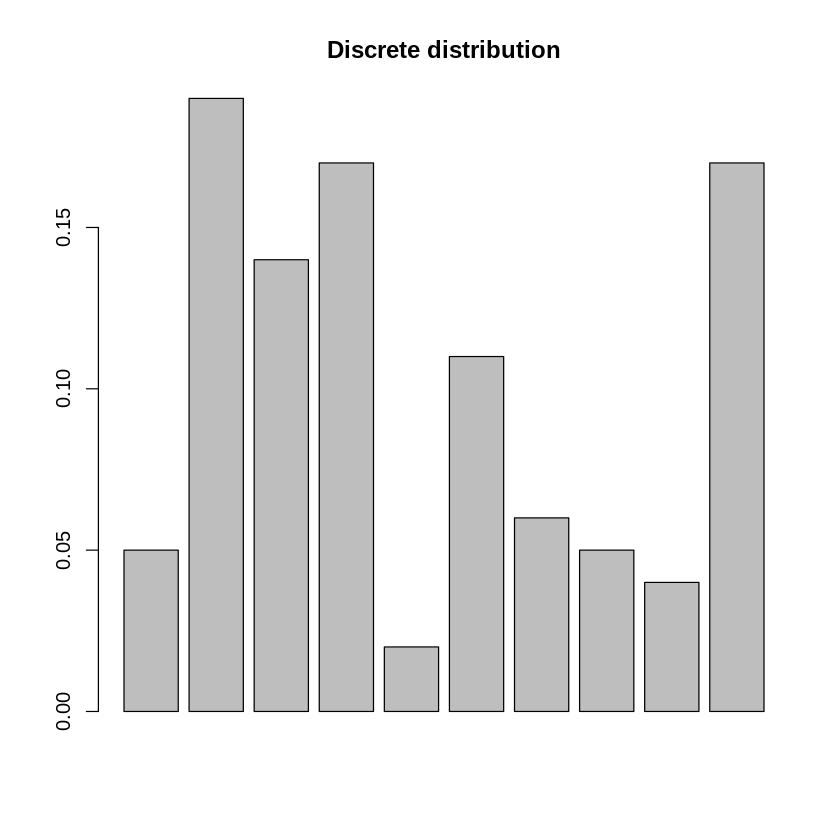

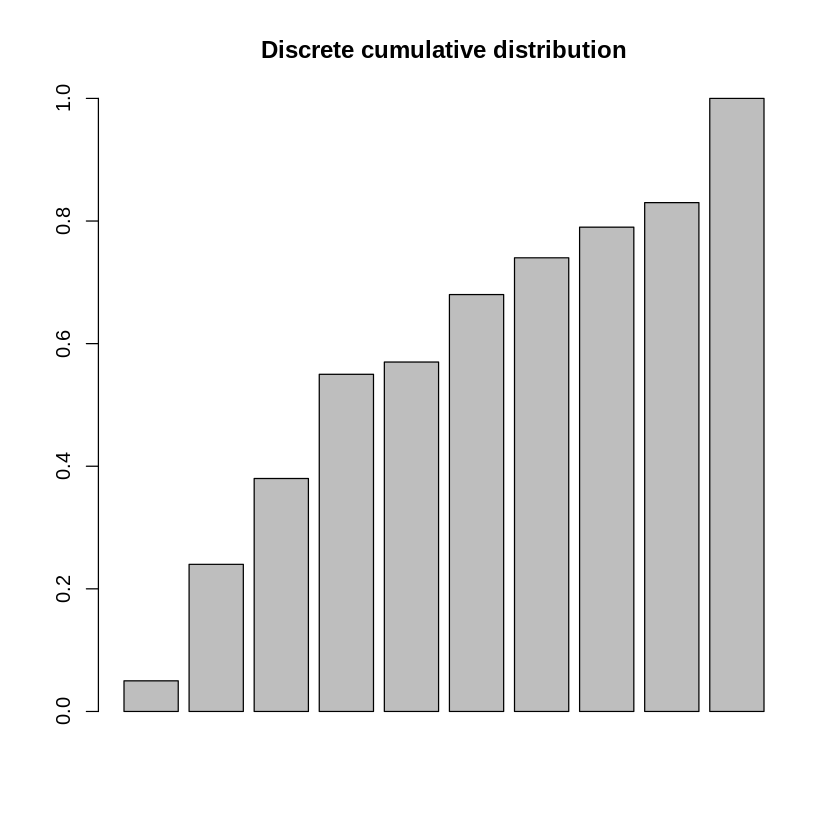

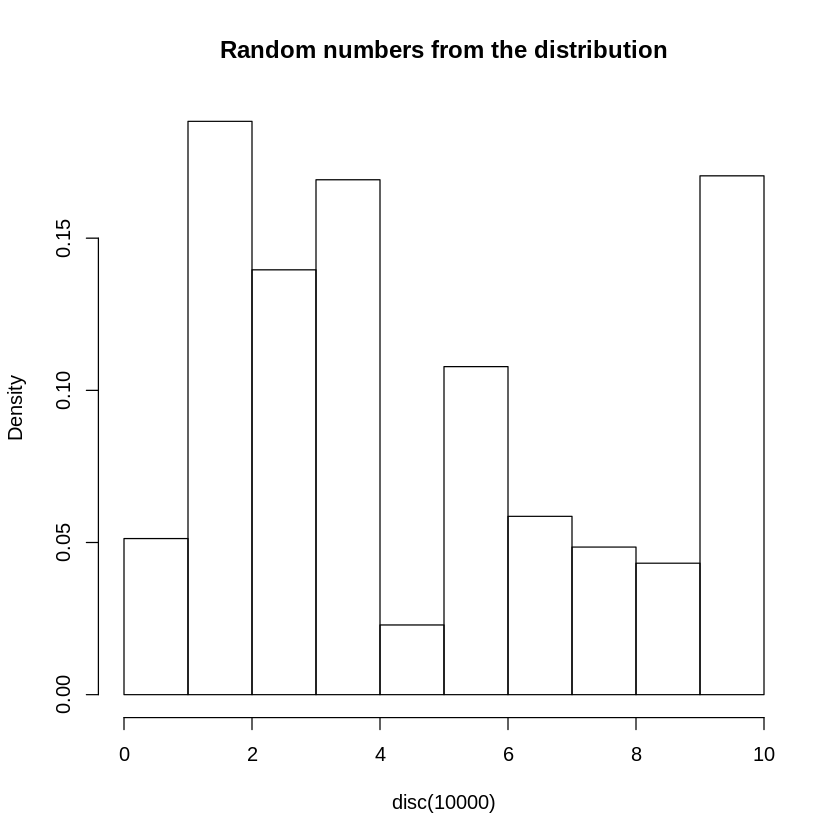

In [85]:
#Ex 2

prob <- c(0.05,0.19,0.14,0.17,0.02,0.11,0.06,0.05,0.04,0.17)
c_prob <- cumsum(prob)
c_fin <- c(0,c_prob)

disc <- function(n){
    u <- runif(n,0,1)
    v <- runif(n,0,10)
    midstep <- findInterval(u,c_fin)
    return(findInterval(u,c_fin)-1 +(u-c_fin[findInterval(u,c_fin)])/prob[findInterval(u,c_fin)])
    }

barplot(prob,main="Discrete distribution")
barplot(c_prob,main="Discrete cumulative distribution")
hist(disc(10000),main="Random numbers from the distribution",prob=TRUE,breaks=seq(0,10,length=11))

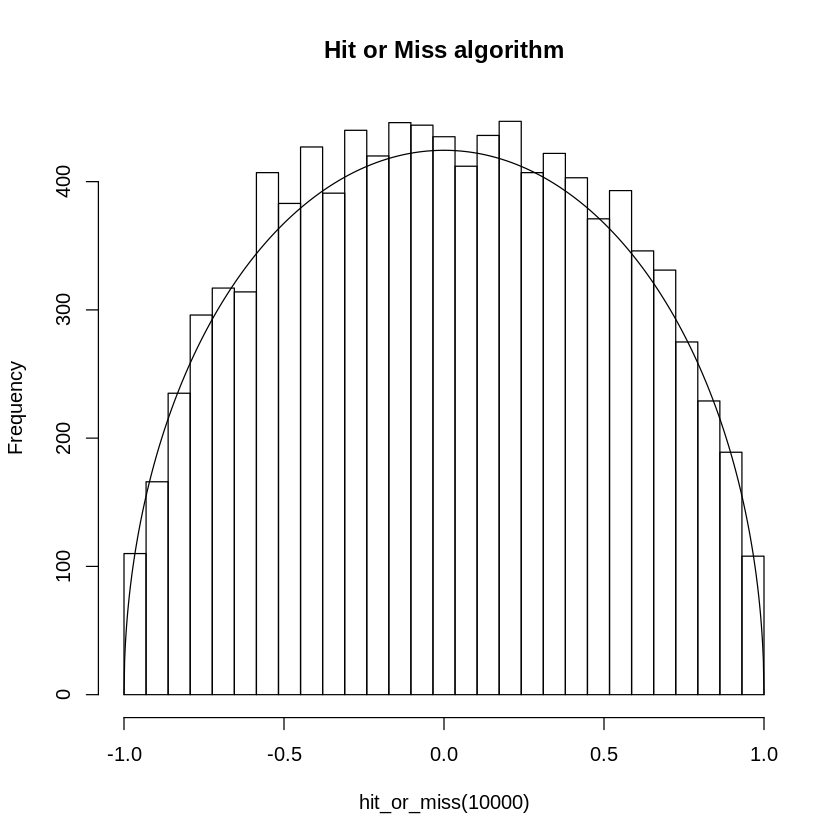

In [116]:
#Ex 3
R <- 1
M <- 2/(pi*R)

hit_or_miss <- function(n){
    carrier <- vector()
    counter <- 0
    while (counter < n){
        u <- runif(n-counter,-R,R)
        test <- runif(n-counter,0,M)
        func <- 2/(R*R*pi)*sqrt(R*R-u*u)
        token<-ifelse(test < func,u,NA)
        token <- token[!(is.na(token))]
        counter <- counter + length(token)
        carrier <- c(carrier,token)
        } 
    carrier <- carrier[1:n]
    return(carrier)
    }

hist(hit_or_miss(10000),main="Hit or Miss algorithm",breaks=seq(-1,1,length=30))
lines(seq(-R,R,length=1000),2/(R*R*pi)*sqrt(R*R-seq(-R,R,length=1000)^2)*10000*2*R/30)

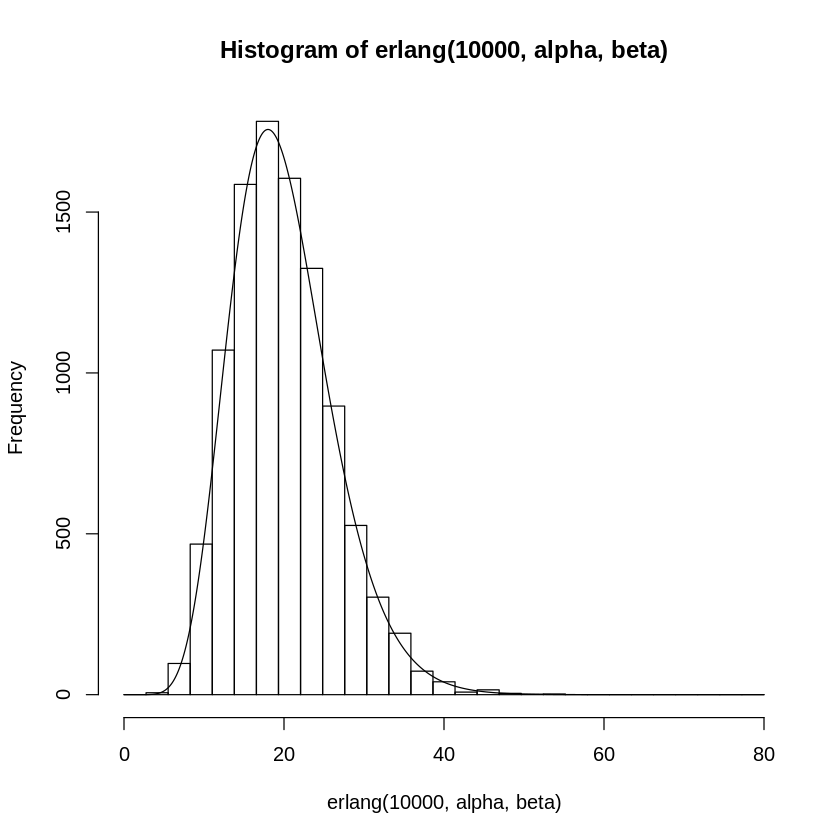

In [117]:
#Ex 4
alpha=10
beta=2

erlang <- function(n,m,b){
    u <- runif(m*n)
    return(-b*log(tapply(u, rep(1:(length(u)/m), each = m), prod)))
    }

hist(erlang(10000,alpha,beta),breaks=seq(0,80,length=30))
lines(seq(0,80,length=1000),dgamma(seq(0,80,length=1000),alpha,1/beta)*10000*8/3)

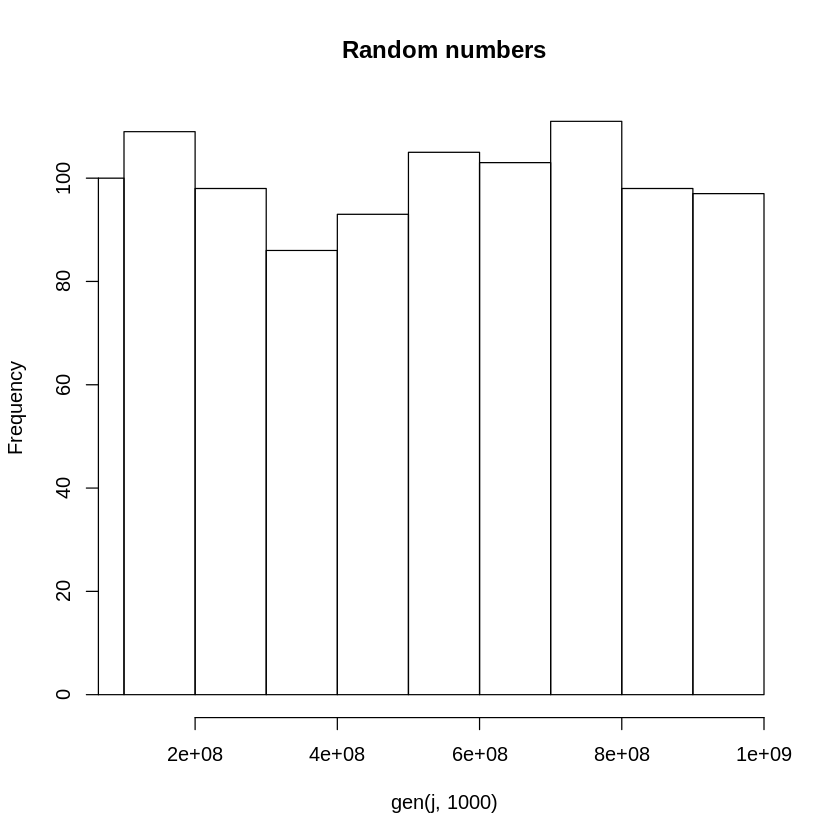

In [145]:
#Ex 5

j = 343432345

gen <- function (i,n){
    carrier <- vector()
    digits = length(unlist(strsplit(as.character(i),"")))
    for (k in 1:n){
        i_2 <- i*i
        
        l <- length(unlist(strsplit(as.character(i),"")))
        num <- unlist(strsplit(as.character(i_2),""))
        l_2 <- length(num)
    
        num <- num[floor(1.0*(l_2-l)/2):(floor((1.0*l_2-l)/2)+digits-1)]
        i <- as.numeric(paste(num,collapse=""))
        carrier <- c(carrier,i)
        }
    return(carrier)
    }

hist(gen(j,1000),main="Random numbers",xlim=c(1e8,1e9))
